# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


# Importing the dataset

In [2]:
dataset = pd.read_csv('breast_cancer.csv')


In [3]:
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
dataset.shape

(683, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [6]:
#Calculating the missing value
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
dataset.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

C:\Users\sarfa\anaconda3\envs\SarfEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2    444
4    239
Name: Class, dtype: int64


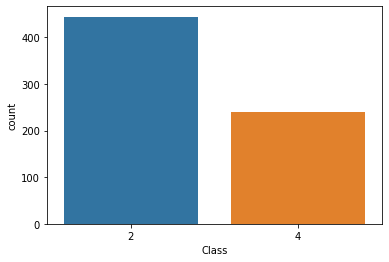

In [8]:
ax = sns.countplot(dataset["Class"])
print(dataset.Class.value_counts())

In [9]:
#Splitting the dataset into independent and dependent variable
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [10]:
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [11]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

# Encoding the Dependent variable

**benign as 0 and malignant as 1**

In [12]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

# Splitting the dataset into training and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
X_train

array([[10,  1,  1, ...,  5,  4,  1],
       [ 1,  1,  1, ...,  3,  1,  1],
       [ 5,  1,  1, ...,  3,  1,  1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 3,  1,  1, ...,  2,  1,  1],
       [10,  9,  7, ...,  7,  7,  1]], dtype=int64)

# Building the ANN

**Initializing the ANN**

In [16]:
ann = tf.keras.models.Sequential()

**Adding the input layer and First hidden layer**

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the second hidden layer**

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the Output Layer**

In [19]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

**Compiling the ANN**

In [20]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the ANN on Training Set**

In [21]:
ann.fit(x= X_train, y= y_train, batch_size=32, epochs=200)

Train on 546 samples
Epoch 1/200
546/546 [==============================] - 1s 2ms/sample - loss: 0.8416 - accuracy: 0.6538
Epoch 2/200
546/546 [==============================] - 0s 91us/sample - loss: 0.7764 - accuracy: 0.6538
Epoch 3/200
546/546 [==============================] - 0s 95us/sample - loss: 0.7311 - accuracy: 0.6538
Epoch 4/200
546/546 [==============================] - 0s 95us/sample - loss: 0.6981 - accuracy: 0.6538
Epoch 5/200
546/546 [==============================] - 0s 97us/sample - loss: 0.6758 - accuracy: 0.6538
Epoch 6/200
546/546 [==============================] - 0s 93us/sample - loss: 0.6535 - accuracy: 0.6593
Epoch 7/200
546/546 [==============================] - 0s 95us/sample - loss: 0.6340 - accuracy: 0.6740
Epoch 8/200
546/546 [==============================] - 0s 100us/sample - loss: 0.6136 - accuracy: 0.6996
Epoch 9/200
546/546 [==============================] - 0s 95us/sample - loss: 0.5920 - accuracy: 0.7491
Epoch 10/200
546/546 [=====================

546/546 [==============================] - 0s 95us/sample - loss: 0.1084 - accuracy: 0.9670
Epoch 79/200
546/546 [==============================] - 0s 93us/sample - loss: 0.1067 - accuracy: 0.9670
Epoch 80/200
546/546 [==============================] - 0s 88us/sample - loss: 0.1057 - accuracy: 0.9689
Epoch 81/200
546/546 [==============================] - 0s 89us/sample - loss: 0.1045 - accuracy: 0.9689
Epoch 82/200
546/546 [==============================] - 0s 93us/sample - loss: 0.1043 - accuracy: 0.9652
Epoch 83/200
546/546 [==============================] - 0s 89us/sample - loss: 0.1028 - accuracy: 0.9707
Epoch 84/200
546/546 [==============================] - 0s 91us/sample - loss: 0.1010 - accuracy: 0.9689
Epoch 85/200
546/546 [==============================] - 0s 91us/sample - loss: 0.1000 - accuracy: 0.9689
Epoch 86/200
546/546 [==============================] - 0s 93us/sample - loss: 0.0991 - accuracy: 0.9689
Epoch 87/200
546/546 [==============================] - 0s 93us/samp

546/546 [==============================] - 0s 102us/sample - loss: 0.0737 - accuracy: 0.9744
Epoch 155/200
546/546 [==============================] - 0s 97us/sample - loss: 0.0721 - accuracy: 0.9762
Epoch 156/200
546/546 [==============================] - 0s 97us/sample - loss: 0.0722 - accuracy: 0.9780
Epoch 157/200
546/546 [==============================] - 0s 88us/sample - loss: 0.0811 - accuracy: 0.9670
Epoch 158/200
546/546 [==============================] - 0s 93us/sample - loss: 0.0754 - accuracy: 0.9707
Epoch 159/200
546/546 [==============================] - 0s 91us/sample - loss: 0.0726 - accuracy: 0.9744
Epoch 160/200
546/546 [==============================] - 0s 93us/sample - loss: 0.0718 - accuracy: 0.9762
Epoch 161/200
546/546 [==============================] - 0s 99us/sample - loss: 0.0739 - accuracy: 0.9725
Epoch 162/200
546/546 [==============================] - 0s 90us/sample - loss: 0.0728 - accuracy: 0.9780
Epoch 163/200
546/546 [==============================] - 0s

# Making prediction and Evaluating the model

**Predicting the result of a single observation**

In [22]:
print(ann.predict([[5,4,4,7,2,1,3,1,1]])>0.5)

[[False]]


**Predicting the test set result**

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


**Evaluating the ANN**

In [24]:
pd.DataFrame(ann.history.history)

,loss,accuracy
0,0.841642,0.653846
1,0.776382,0.653846
2,0.731138,0.653846
3,0.698061,0.653846
4,0.675776,0.653846
...,...,...
195,0.067542,0.979853
196,0.067855,0.979853
197,0.067461,0.981685
198,0.067489,0.981685


<AxesSubplot:>

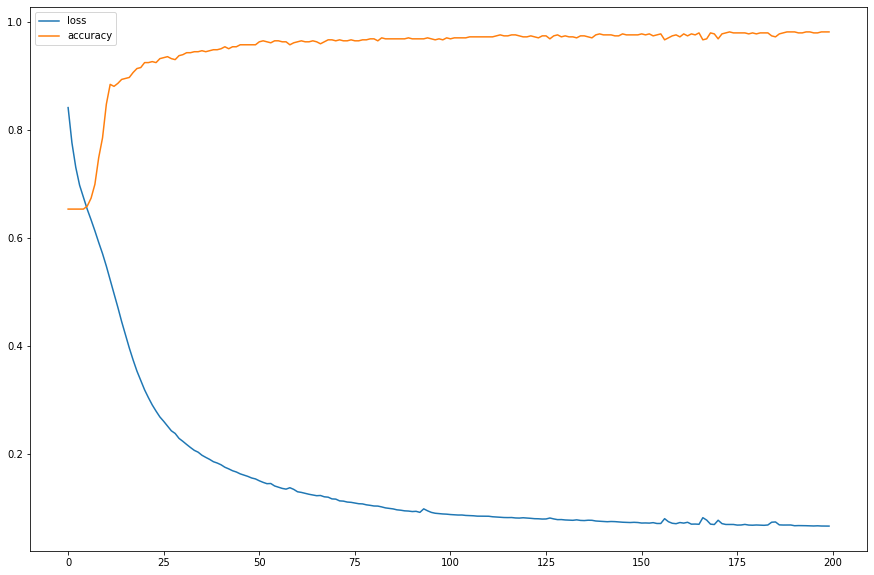

In [25]:
pd.DataFrame(ann.history.history).plot(figsize=(15,10))

In [26]:
ann.evaluate(X_train, y_train)

546/546 [==============================] - 0s 444us/sample - loss: 0.0668 - accuracy: 0.9817


[0.06675471948978283, 0.981685]

In [27]:
ann.evaluate(X_test, y_test)

137/137 [==============================] - 0s 123us/sample - loss: 0.0877 - accuracy: 0.9635


[0.08767451918310057, 0.96350366]

**Making the confusion matrix**

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac=accuracy_score(y_test, y_pred)

[[84  3]
 [ 2 48]]


**Printing the Accuracy of Model**

In [29]:
print("Accuracy: {:.2f} %".format(ac*100))

Accuracy: 96.35 %


# Designing the FrontEnd

In [52]:
from tkinter import *


root = Tk()
w = "800"
h = "1000"
f14 = "14"
f10 = "10"

root.geometry(f"{w}x{h}")
root.configure(bg='#1F2833')
root.minsize(w, h)
root.maxsize(w, h)
root.title("Breast Cancer Detection")

# Algo


def algo():

    # Range must be in between in 1-10
   
    if(v1.get() > 10 or v2.get() > 10 or v3.get() > 10 or v4.get() > 10 or v5.get() > 10 or v6.get() > 10 or v7 .get() > 10 or v8.get() > 10 or v9.get() > 10):
        ran = "Please give Valid range"
        blank.delete(0, END)
        blank.insert(0, ran)
    else:
          
        # Initializing the variable that is to be used as a input in ANN algo

        Clump = v1.get()
        print("Clump:", Clump)
        Size = v2.get()
        print("Size:", Size)
        Shape = v3.get()
        print("Shape:", Shape)
        Adhesion = v4.get()
        print("Adhesion:", Adhesion)
        Epithelial_size = v5.get()
        print("Epithelial_size:", Epithelial_size)
        Bare = v6.get()
        print("Bare:", Bare)
        Bland = v7.get()
        print("Bland:", Bland)
        Nucleoli = v8.get()
        print("Nucleoli:", Nucleoli)
        Mitoses = v9.get()
        print("Mitoses:", Mitoses)

#         #Temporary True
#         blank.delete(0,END)
#         blank.insert(0,"True")





    # ANN Algorithm Starts from here
    
    predict=(ann.predict([[v1.get(),v2.get(),v3.get(),v4.get(),v5.get(),v6.get(),v7.get(),v8.get(),v9.get()]])>0.5)
    
    #predict=print(ann.predict([[5,4,4,7,2,1,3,1,1]])>0.5)
     
    
    # After ANN algo we will get Class as a output which may be 2 known as beingn or 4 known as malignant



    # Here cl is the class 
    #predict = output of ANN algo Class may be 2 or 4
    if predict[0][0] == False:
        ans = "Benign"
    else:
        ans = "Malignant"
    
    blank.delete(0,END)
    blank.insert(0,ans)
    print(ans)


label = Label(root, text="Breast Cancer Detection",
              font="Arial 25 bold", bg="#1F2833", fg="#FFE400")
label.grid(padx=180, pady=60)

f = Frame(root, borderwidth=5, padx=25, pady=25, bg="#0B0C10")
f.grid()
Label(f, text="*Give input range from 1-10.").grid(column=1)
Label(f, text="Clump Thickness: ", bg="#0B0C10",
      fg="white", font=("Cooper Black", f14)).grid(row=1, column=0)
Label(f, text="Cell Size: ", bg="#0B0C10", fg="white",
      font=("Cooper Black", f14)).grid(row=2, column=0)
Label(f, text="Cell Shape: ", bg="#0B0C10", fg="white",
      font=("Cooper Black", f14)).grid(row=3, column=0)
Label(f, text="Marginal Adhesion: ", bg="#0B0C10",
      fg="white", font=("Cooper Black", f14)).grid(row=4, column=0)
Label(f, text="Epithelial Cell Size: ", bg="#0B0C10",
      fg="white", font=("Cooper Black", f14)).grid(row=5, column=0)
Label(f, text="Bare Nuclei: ", bg="#0B0C10", fg="white",
      font=("Cooper Black", f14)).grid(row=6, column=0)
Label(f, text="Bland Chromatin: ", bg="#0B0C10",
      fg="white", font=("Cooper Black", f14)).grid(row=7, column=0)
Label(f, text="Normal Nucleoli: ", bg="#0B0C10",
      fg="white", font=("Cooper Black", f14)).grid(row=8, column=0)
Label(f, text="Mitoses: ", bg="#0B0C10", fg="white",
      font=("Cooper Black", f14)).grid(row=9, column=0)
Label(f, text="Result:", bg="#0B0C10", fg="#FC4445",
      font=("Cooper Black", 20)).grid(row=11, column=0)

# Declare IntVar
v1 = IntVar()
v2 = IntVar()
v3 = IntVar()
v4 = IntVar()
v5 = IntVar()
v6 = IntVar()
v7 = IntVar()
v8 = IntVar()
v9 = IntVar()
b = StringVar()


clump = Entry(f, textvariable=v1, bg="#45A29E", font=("Arial", f10))
size = Entry(f, textvariable=v2, bg="#45A29E", font=("Arial", f10))
shape = Entry(f, textvariable=v3, bg="#45A29E", font=("Arial", f10))
adhesion = Entry(f, textvariable=v4, bg="#45A29E", font=("Arial", f10))
epithelial_size = Entry(f, textvariable=v5, bg="#45A29E", font=("Arial", f10))
bare = Entry(f, textvariable=v6, bg="#45A29E", font=("Arial", f10))
bland = Entry(f, textvariable=v7, bg="#45A29E", font=("Arial", f10))
nucleoli = Entry(f, textvariable=v8, bg="#45A29E", font=("Arial", f10))
mitoses = Entry(f, textvariable=v9, bg="#45A29E", font=("Arial", f10))
blank = Entry(f, textvariable=b, bg="#45A29E", font=("Arial", 14))

clump.grid(row=1, column=1)
size.grid(row=2, column=1)
shape.grid(row=3, column=1)
adhesion.grid(row=4, column=1)
epithelial_size.grid(row=5, column=1)
bare.grid(row=6, column=1)
bland.grid(row=7, column=1)
nucleoli.grid(row=8, column=1)
mitoses.grid(row=9, column=1)


Button(f, text="Submit", bg="#F13C20", padx=10, pady=5,
       command=algo, font=("ALGERIAN", 16)).grid(row=10, column=1, pady=15)

blank.grid(row=11, column=1)

root.mainloop()


Clump: 5
Size: 5
Shape: 6
Adhesion: 4
Epithelial_size: 5
Bare: 6
Bland: 2
Nucleoli: 1
Mitoses: 2
Malignant
